# Problem 1: Bayes Classifier

Bayes classifiers fall under the class of **generative classifiers**. Generative classifiers attempt to learn the generation process of a dataset, usually by making some assumptions about the process that generates the data. Then such classifiers use the learned model to make a prediction or classify the unseen data. A simple example is a Naïve Bayes Classifier.

### Naïve Bayes classifier
Consider a dataset $\left\{X^{(i)}, Y^{(i)}\right\}_{i=1}^{m}$. Each $X^{(i)}$ is an $n-$dimensional vector of input features. Let $Y^{(i)} \in \{0,1\}$ denote the class to which $X^{(i)}$ belongs (this can be easily extended to multi-class problems as well). A good classifier has to accurately predict the probability that any given input $X$ falls in class $1$ which is $ P(Y=1 | X)$. 

Recall Bayes theorem,

\begin{align}
P(Y|X) &= \frac{P(X|Y)P(Y)}{P(X)} \\
       &= \frac{P(X_1, X_2, \dots, X_n | Y)P(Y)}{P(X_1, X_2, \dots, X_n)}\\
\end{align}

**We use the assumption that features are independent of each other. That is one particular feature does not affect any other feature. Of course these assumptions of independence are rarely true, which is why the model is referred as the "Naïve Bayes" model. However, in practice, Naïve Bayes models have performed surprisingly well even on complex tasks, where it is clear that the strong independence assumptions are false.**

The independence assumption reduces the conditional probability expression to
\begin{align}
P(Y|X) &= \frac{P(X_1 | Y)P(X_2 | Y) \dots P(X_n | Y)P(Y)}{P(X_1)P(X_2)\dots P(X_n)}\\
\end{align}

The terms $P(X_i|Y)$ and $P(X_i)$ can be easily estimated/learned from the dataset. Hence, the value of $P(Y|X)$ can be found for each value of $Y$. Finally, the class to which $X$ belongs is estimated as $arg\max_{Y}P(Y|X)$. Moreover since $X$ is independent of $Y$, it is only required to find $arg\max_{Y}P(X|Y)P(Y).$ For better understanding with an example refer [this](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c) article.


### Problem statement and Dataset
In this problem, you would implement, train and test a Naïve Bayes model to learn to classify sentiment (positive/negative) of a given text. The training data is in `all_sentiment_shuffled.txt` file.  You can use the function given below to read the dataset


In [1]:
def read_corpus(corpus_file):
    """ This function reads the file in the location specified by string 
    `corpus_file` and returns a list of tuples (list of words in text, label)
    """
    out = []
    with open(corpus_file, encoding="utf8") as f:
        for line in f:
            tokens = line.strip().split()
            out.append([tokens[3:], tokens[1]])
    return out

In [2]:
corpus = read_corpus('./all_sentiment_shuffled.txt')
print("Example:\n", " Text: ", corpus[0][0], "\nLabel: ", corpus[0][1])
print("Total number of documents =", len(corpus))

Example:
  Text:  ['i', 'bought', 'this', 'album', 'because', 'i', 'loved', 'the', 'title', 'song', '.', 'it', "'s", 'such', 'a', 'great', 'song', ',', 'how', 'bad', 'can', 'the', 'rest', 'of', 'the', 'album', 'be', ',', 'right', '?', 'well', ',', 'the', 'rest', 'of', 'the', 'songs', 'are', 'just', 'filler', 'and', 'are', "n't", 'worth', 'the', 'money', 'i', 'paid', 'for', 'this', '.', 'it', "'s", 'either', 'shameless', 'bubblegum', 'or', 'oversentimentalized', 'depressing', 'tripe', '.', 'kenny', 'chesney', 'is', 'a', 'popular', 'artist', 'and', 'as', 'a', 'result', 'he', 'is', 'in', 'the', 'cookie', 'cutter', 'category', 'of', 'the', 'nashville', 'music', 'scene', '.', 'he', "'s", 'gotta', 'pump', 'out', 'the', 'albums', 'so', 'the', 'record', 'company', 'can', 'keep', 'lining', 'their', 'pockets', 'while', 'the', 'suckers', 'out', 'there', 'keep', 'buying', 'this', 'garbage', 'to', 'perpetuate', 'more', 'garbage', 'coming', 'out', 'of', 'that', 'town', '.', 'i', "'ll", 'get', 'down'

### Preprocessing a text document
We can guess that not all the words in a document will be helpful in classification. The words such as "a", "the", "is", etc appear in all the documents randomly and can be neglected or removed. Also a same word can be written in different tenses while conveying the same mood (example "rot"/"rotten"). Hence the documents need to be preprocessed before using them for training the classifier.

 Libraries such as `gensim`, `nltk` contain functions for doing these preprocessing steps, and you are welcome to use such functions in your code. Formally, these are the preprocessings to be done to the input text to make them simpler and which can improve the performance of your model as well.
* **Tokenization**: 
    1.   Split the text into sentences and the sentences into words
    2.   Lowercase the words and remove punctuation
* Remove all **stopwords** (stopwords are commonly used word such as "the", "a", "an", "in")
* Remove all words that have fewer than 3 characters.
* **Lemmatize** the document (words in third person are changed to first person, and verbs in past and future tenses are changed into present).


In [3]:
""" Implement preprocessing functions here. Use the python modules named above 
for implementing the functions. 
"""

# Removes all the punctuations present in the document
def remove_punctuation(doc):
    # implement
    words = [word for word in doc if word.isalpha()]
    return words[:]
    # comment the next line out
    #pass

# Removes words like 'if', 'he', 'she', 'the', etc which never belongs to any topic
def remove_stopwords(doc):
    # implement
    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    words = [word for word in doc if not word in stop_words]
    return words[:]
    # comment the next line out
    #pass

# lemmatizer is a transformers which transforms the word to its singular, present-tense form
def lemmatize(doc):
    # implement
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in doc]
    # comment the next line out
    #pass
    return words[:]

def preprocess(doc):
    """ Function to preprocess a single document
    """
    assert isinstance(doc, list) 
    processed_doc = remove_punctuation(doc)
    processed_doc = remove_stopwords(processed_doc)
    processed_doc = lemmatize(processed_doc)
    return processed_doc

In [4]:
#counting neg data
negcount=0
for i in range(len(corpus)):
    if corpus[i][1]=='neg':
        negcount+=1
poscount=len(corpus)-negcount
print(negcount, poscount)

5914 6000


**We can see that we have 5914 statements with negative labels and 6000 statements with positive labels.**

### Implementation of Naïve Bayes 

You can refer the Naïve Bayes section in [this](https://web.stanford.edu/~jurafsky/slp3/slides/7_NB.pdf) slides (slide #32 has a simple pseudo code) to get a hint about implementation of Naïve Bayes for text classification. Then complete the following functions `train_nb` and `classify_nb`.

NOTE: If you multiply many small probabilities you may run into problems with numeric precision: the probability becomes zero. To handle this problem, it is recommended that you compute the logarithms of the probabilities instead of the probabilities.

In [5]:
def train_nb(corpus):
    # return the data you need to classify new instances
    corpusX = [(preprocess(corpus[i][0]),corpus[i][1]) for i in range(len(corpus))]
    negcount=0
    for i in range(len(corpus)):
        if corpus[i][1]=='neg':
            negcount+=1
    poscount=len(corpus)-negcount
    PofCs=[negcount/(negcount+poscount), poscount/(negcount+poscount)] #p(c)
    
    vocabularyN={} #dictionary containing no: of occurences of each word in neg statements
    vocabularyP={}
    for i in range(len(corpusX)):
        if corpusX[i][1]=='neg':
            for each in corpusX[i][0]:
                try:
                    vocabularyN[each]+=1
                except:
                    vocabularyN[each]=1
        else:
            for each in corpusX[i][0]:
                try:
                    vocabularyP[each]+=1
                except:
                    vocabularyP[each]=1
    return vocabularyN, vocabularyP, PofCs  # used for predicting test data.
    # comment the next line out
    #pass

def classify_nb(docs, vocabularyN, vocabularyP, PofCs,alpha=1):
    # return the guess of the classifier
    from math import log
    from math import exp
    Ps=sum(vocabularyP.values())
    Ns=sum(vocabularyN.values())
    Pss=len(vocabularyP)
    Nss=len(vocabularyN)
    final = []
    for doc in docs:
        assert isinstance(doc, list)
        docX = preprocess(doc)
        A=B=0
        for word in docX:
            try:
                A+=log((Ns+alpha*Nss)/(vocabularyN[word]+alpha))
            except KeyError:
                A+=log((Ns+alpha*Nss)/(alpha))
            try:
                B+=log((Ps+alpha*Pss)/(vocabularyP[word]+alpha))
            except KeyError:
                B+=log((Ps+alpha*Pss)/(alpha))
        
        AA = PofCs[0]*exp(-A)
        BB = PofCs[1]*exp(-B)
        final.append('neg' if AA > BB else 'pos')
    #return [corpus[i][1] for i in range(len(corpus))]
    # comment the next line out
    return final

In [6]:
vocabularyN, vocabularyP, PofCs = train_nb(corpus)

In [7]:
classify_nb([corpus[3][0]], vocabularyN, vocabularyP, PofCs)

['pos']

In [8]:
X_=[row[0] for row in corpus]

In [9]:
Y_=[row[1] for row in corpus]

In [10]:
Y_pred=classify_nb([row[0] for row in corpus],vocabularyN, vocabularyP, PofCs)

In [11]:
len(Y_),len(Y_pred)

(11914, 11914)

**Accuracy function :**

In [12]:
def accuracypercent(Y_, Y_pred):
    assert len(Y_)==len(Y_pred)
    ans=0
    for i in range(len(Y_)):
        if Y_[i]==Y_pred[i]:
            ans+=1
    return ans/len(Y_)*100

In [13]:
accuracypercent(Y_, Y_pred)

82.65905657210006

**Our naive bayes model has a training accuracy of 82%**

### Train-test split
After reading the dataset, you must split the dataset into training ($80\%$) and test data ($20\%$). Use training data to train the Naïve Bayes classifier and use test data to check the accuracy.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.2)

vocabularyN_T, vocabularyP_T, PofCs_T = train_nb([[X_train[i], y_train[i]] for i in range(len(y_train))])

y_pred=classify_nb(X_test, vocabularyN_T, vocabularyP_T, PofCs_T)

accuracypercent(y_test, y_pred)

73.89844733529165

**Accuracy of our trained naive bayes model is 73%**

### Comparison (Bonus)
Also use `sklearn`'s Naïve Bayes classifier and compare its performance with the classifier you implemented. 

Make sure your code is well documented with comments explaining everything done in your algorithm. With this being said, you are free to design your code anyway you like as long as it implements a Naïve Bayes model and is easily understandable. If you digress from the given code template, explain briefly the structure of your code as well.

# Problem 2: Regularization and bias-variance trade-off


### Problem statement
In this question we will see how regularization can be used to prevent overfitting of data and then observe the bias-variance tradeoff in a practical setting.

### Dataset generation
- Generate 10 data points $f(x)=sin(2\pi x)$ where $x \hspace{0.1cm} \epsilon \hspace{0.1cm} [0, 1]$ is sampled uniformly.
- Add Gaussian noise $N(0, 0.5)$ to the generated data. By generating data in this way, we are capturing a property of many real data sets - namely, that they possess an underlying regularity $f(x)$, which we wish to learn, but that individual observations are corrupted by random noise $N(0,0.5)$.
- We will now use this set of 10 data points as the training dataset.

In [4]:
import numpy as np
x = np.linspace(0,1,10,dtype=float)
y = np.sin(np.pi*2*x)

disturbance = np.random.normal(0,0.5,(10,))

z = y + disturbance

In [5]:
z

array([-0.90486784,  0.18409758,  1.51859535,  0.91220741,  0.42573208,
        0.25543762, -1.05495762, -0.93634804, -0.79710234, -0.81418944])

### Polynomial curve fitting 
- Fit 5 polynomial regression models with varying polynomial orders $M = \{0, 1, 3, 6, 9\}$ on the training dataset. Use the polynomial function of the form:  $y(x, \textbf{w})=\sum^{M}_{j=0}w_jx^j$ and $L2$ loss as the error function: $E(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2$, where $t_n$ is the true output for the input $x_n$, and $N$ is the total number of training points.
- For each model: $M = \{0, 1, 3, 6, 9\}$, plot the graph of the function obtained from fitting the model onto the training dataset along with the training dataset points. 
- Report the mean squared error on the training dataset and explain its trend with increasing model complexity. Comment on overfitting and underfitting.
- For each model: $M = \{0, 1, 3, 6, 9\}$, report the coefficients $\textbf{w}^*$. Explain the trend in the coefficients with increasing model complexity. 
- The goal here is to achieve good generalization by making
accurate predictions for new data, and not the training data. Use the data generation procedure used previously to generate 100 data points but with new choices for the random noise values included in the target values. These 100 data points will now form our validation dataset.
- Evaluate each model: $M = \{0, 1, 3, 6, 9\}$ on the validation set and report the mean squared error for each model. 
- Plot the training and validation set mean squared errors for models with $M = \{0, 1, 3, 6, 9\}$ on the same graph. Explain the trend in the error values with increasing model complexity.

In [6]:
import matplotlib.pyplot as plt

**We will be using np.polyfit model, which fits a polynomial curve of required degree by minimizing mean square error**

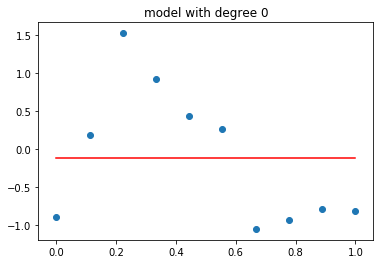

 
-0.1211
error =  0.7378640067782957


In [7]:
mymodel0 = np.poly1d(np.polyfit(x, z, 0))


xx = np.linspace(0,1,100)
plt.figure()
plt.scatter(x, z)
plt.plot(xx, mymodel0(xx),'r')
plt.title("model with degree 0")
plt.show()
print(mymodel0)
print('error = ',0.1*np.sum(np.square(mymodel0(x)-z)))

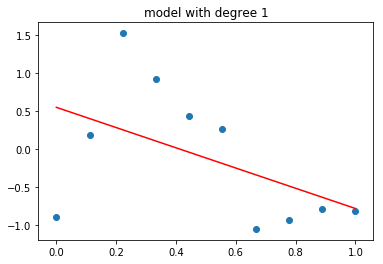

 
-1.331 x + 0.5443
error =  0.5574696254471329


In [8]:
mymodel1 = np.poly1d(np.polyfit(x, z, 1))


xx = np.linspace(0,1,100)
plt.figure()
plt.scatter(x, z)
plt.plot(xx, mymodel1(xx),'r')
plt.title("model with degree 1")
plt.show()
print(mymodel1)
print('error = ',0.1*np.sum(np.square(mymodel1(x)-z)))

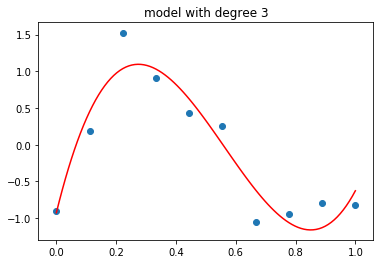

       3         2
23.58 x - 39.79 x + 16.51 x - 0.9261
error =  0.07688356688428179


In [9]:
mymodel3 = np.poly1d(np.polyfit(x, z, 3))


xx = np.linspace(0,1,100)
plt.figure()
plt.scatter(x, z)
plt.plot(xx, mymodel3(xx),'r')
plt.title("model with degree 3")
plt.show()
print(mymodel3)
print('error = ',0.1*np.sum(np.square(mymodel3(x)-z)))

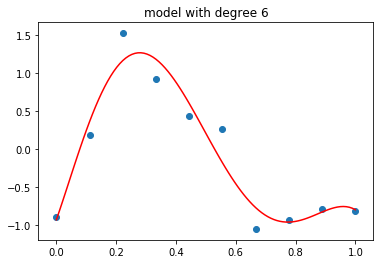

       6         5         4         3        2
40.69 x - 204.1 x + 327.4 x - 196.7 x + 21.5 x + 11.25 x - 0.9355
error =  0.05322486257482831


In [10]:
mymodel6 = np.poly1d(np.polyfit(x, z, 6))


xx = np.linspace(0,1,100)
plt.figure()
plt.scatter(x, z)
plt.plot(xx, mymodel6(xx),'r')
plt.title("model with degree 6")
plt.show()
print(mymodel6)
print('error = ',0.1*np.sum(np.square(mymodel6(x)-z)))

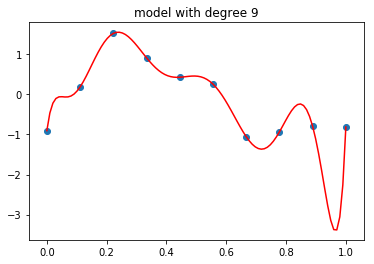

           9             8             7             6             5
6.868e+04 x - 2.942e+05 x + 5.229e+05 x - 4.984e+05 x + 2.749e+05 x
              4             3        2
 - 8.818e+04 x + 1.563e+04 x - 1372 x + 55.89 x - 0.9049
error =  9.048135821394672e-21


In [11]:
mymodel9 = np.poly1d(np.polyfit(x, z, 9))


xx = np.linspace(0,1,100)
plt.figure()
plt.scatter(x, z)
plt.plot(xx, mymodel9(xx),'r')
plt.title("model with degree 9")
plt.show()
print(mymodel9)
print('error = ',0.1*np.sum(np.square(mymodel9(x)-z)))

**For every model above, final polynomial is printed below and also the mean square training error.**

**We can observe that as model complexity (degree of polynomial) increase, co-efficients also increases. This is the root cause of using L2 regularization.**

In [12]:
x_val = np.linspace(0,1,100,dtype=float)
y_val = np.sin(np.pi*2*x_val)

disturbance_val = np.random.normal(0,0.5,(100,))

z_val = disturbance_val + y_val

In [13]:
print('Validation Mean Square Error in case 0f 0-degree poly model is',0.01*np.sum(np.square(mymodel0(x_val)-z_val)))
print('Validation Mean Square Error in case 0f 1-degree poly model is',0.01*np.sum(np.square(mymodel1(x_val)-z_val)))
print('Validation Mean Square Error in case 0f 3-degree poly model is',0.01*np.sum(np.square(mymodel3(x_val)-z_val)))
print('Validation Mean Square Error in case 0f 6-degree poly model is',0.01*np.sum(np.square(mymodel6(x_val)-z_val)))
print('Validation Mean Square Error in case 0f 9-degree poly model is',0.01*np.sum(np.square(mymodel9(x_val)-z_val)))


Validation Mean Square Error in case 0f 0-degree poly model is 0.8682633285127421
Validation Mean Square Error in case 0f 1-degree poly model is 0.5014581699035078
Validation Mean Square Error in case 0f 3-degree poly model is 0.40948482156373167
Validation Mean Square Error in case 0f 6-degree poly model is 0.4101434357210043
Validation Mean Square Error in case 0f 9-degree poly model is 0.9091918069051443


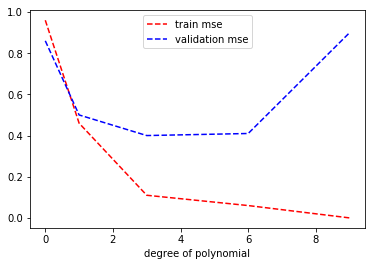

In [14]:
plt.figure()
plt.plot((0,1,3,6,9),(0.96, 0.46, 0.11, 0.06, 0),'r--', label = 'train mse')
plt.plot((0,1,3,6,9),(0.86, 0.50, 0.40, 0.41, 0.9),'b--', label = 'validation mse')
plt.legend()
plt.xlabel('degree of polynomial')
plt.show()

**We can observe that training error decreases as model complexity increases.**  
**But because of overfitting to training set, Validation error increases.**  
**This is also called as bias-variance trade-off.**

### Regularization

We've seen the effects of increasing model complexity on the training error and the validation error above. We will now use L2 regularization to reduce overfitting.

- Fit a polynomial regression model of order $M=9$ to the same training dataset as before but now using the regularized error function given by $E^{'}(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2 + \frac{\lambda}{2}{\|\textbf{w}\|}^2$ where $\lambda$ is the regularization hyperparameter. Use the following values for $\lambda$: $\lambda={0.01, 0.1, 1}$.
- Report the coefficients of the model fit above for $\lambda={0.01, 0.1, 1}$. Explain the trend in the coefficient values with increasing $\lambda$.
- Find the optimal value of the hyperparameter $\lambda$. 
- Compare the validation error results of the following two models : polynomial regression model of order $M=9$ without regularization and polynomial regression model of order $M=9$ with regularization hyperparameter as estimated above.

In [15]:
x_val = np.linspace(0,1,100,dtype=float)
y_val = np.sin(np.pi*2*x_val)

disturbance_val = np.random.normal(0,0.5,(100,))

z_val = disturbance_val + y_val

In [16]:
X=np.c_[x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9]
X_val=np.c_[x_val,x_val**2,x_val**3,x_val**4,x_val**5,x_val**6,x_val**7,x_val**8,x_val**9]

from sklearn import metrics

**We'll be using Ridge model in sklearn which uses the same type of regularization asked above.**

In [17]:
from sklearn import linear_model
alpha=0.005
reg = linear_model.Ridge(alpha=alpha)

reg.fit(X,z)

coef = reg.coef_
intercept = reg.intercept_

z_pred = reg.predict(X_val)
print('Train Error: ',metrics.mean_squared_error(z, reg.predict(X)))
print('Validation Error: ',metrics.mean_squared_error(z_val, z_pred))

print('coefficients for lambda=',2*alpha,'are',coef)

Train Error:  0.17770018835143003
Validation Error:  0.3825814309844241
coefficients for lambda= 0.01 are [ 6.27552498 -7.85078643 -4.43924703 -0.23306504  2.04314365  2.56695559
  1.91089371  0.55123404 -1.18211515]


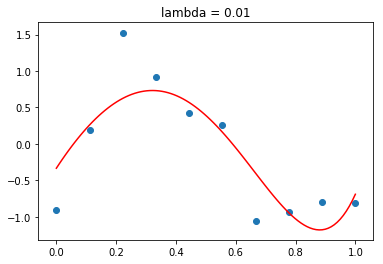

In [18]:
plt.figure()
plt.scatter(x, z)
plt.plot(x_val, z_pred,'r')
plt.title("lambda = 0.01")
plt.show()
#print('error = ',0.1*np.sum(np.square(mymodel9(x)-z)))

In [19]:
from sklearn import linear_model
alpha=0.05
reg = linear_model.Ridge(alpha=alpha)

reg.fit(X,z)

coef = reg.coef_
intercept = reg.intercept_

z_pred = reg.predict(X_val)
print('Train Error: ',metrics.mean_squared_error(z, reg.predict(X)))
print('Validation Error: ',metrics.mean_squared_error(z_val, z_pred))

print('coefficients for lambda=',2*alpha,'are',coef)

Train Error:  0.33739885916587514
Validation Error:  0.4168672445410405
coefficients for lambda= 0.1 are [ 1.67633971 -1.95754304 -1.8267925  -1.03111598 -0.30518263  0.22315238
  0.57153532  0.78345902  0.8988139 ]


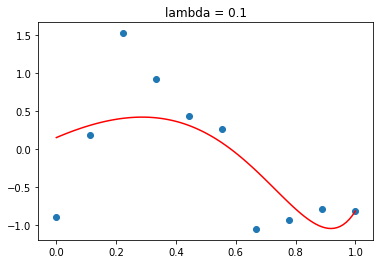

In [20]:
plt.figure()
plt.scatter(x, z)
plt.plot(x_val, z_pred,'r')
plt.title("lambda = 0.1")
plt.show()

In [21]:
from sklearn import linear_model
alpha=0.5
reg = linear_model.Ridge(alpha=alpha)

reg.fit(X,z)

coef = reg.coef_
intercept = reg.intercept_

z_pred = reg.predict(X_val)
print('Train Error: ',metrics.mean_squared_error(z, reg.predict(X)))
print('Validation Error: ',metrics.mean_squared_error(z_val, z_pred))

print('coefficients for lambda=',2*alpha,'are',coef)

Train Error:  0.47662909718663177
Validation Error:  0.49485897631275333
coefficients for lambda= 1.0 are [-0.07792055 -0.53456706 -0.47975866 -0.32475463 -0.17456478 -0.0514317
  0.04432217  0.1174119   0.17291592]


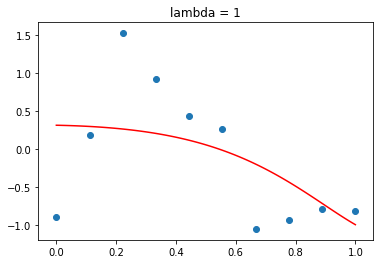

In [22]:
plt.figure()
plt.scatter(x, z)
plt.plot(x_val, z_pred,'r')
plt.title("lambda = 1")
plt.show()

**Based on validation errors, we can find that the optimal value of hyperparameter $\lambda$ is 0.01**  
**Due to regularization, validation error reduced enormously from 0.9 to 0.38 (for M = 9). Thus we prevented overfitting to training dataset.**

### Bias-variance trade-off:

In class you have seen that the expected prediction error for any model can be decomposed as the sum of $bias^2, variance$ and $irreducible\,noise$. We will now observe the bias-variance trade-off for a polynomial regression model of order $M=9$ with varying regularization hyperparameter.
- Generate $50$ datasets, each containing $10$ points, independently, from the curve $f(x)=sin(2\pi x)$. Add gaussian noise $N(0,0.5)$ to each data point.
- Fit a polynomial regression model of order $M=9$ to each training dataset by minimizing the regularized error function $E^{'}(\textbf{w})$ with $\lambda=1$.
- Plot the following:
  - function obtained by training the model on each of the 50 datasets in the same figure.
  - The corresponding average of the 50 fits and the sinusoidal function from which the datasets were generated in the same figure.
- Repeat this exercise for two more $\lambda$ values: $\lambda$ = 0.1, 10.
- Based on the plots obtained, explain the trend in the bias and variance values with increasing model complexity.
- Bonus (optional and will not be graded) : 
  - Plot the $bias^2$, $variance$  and $bias^2 + variance$ against $\lambda$.
  - Also plot the average test error on a test data size of 1000 points (generated in a similiar way as the 50 training datasets, but independently) against $\lambda$ on the same figure.
  - For your reference: 
$$
Bias^2= (E_{D}[\hat f(x)] - f(x))^2
\\
Variance = E_{D}[(\hat f(x) - E_{D}[\hat f(x)])^2]
$$
Here $\hat f$ is the trained model and $D$ is the set of all datasets. Use the $50$ training datasets to compute the empirical estimations.

In [23]:
import matplotlib.pyplot as plt
import numpy as np

datasets= []

for i in range(50):
    x = np.linspace(0,1,10,dtype=float)
    y = np.sin(np.pi*2*x)

    disturbance = np.random.normal(0,0.5,(10,))

    z = y + disturbance
    datasets.append(z)
    

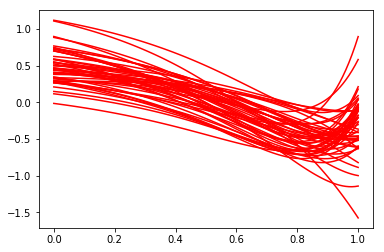

In [24]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model
models = []
poly = PolynomialFeatures(degree = 9) 
#X_poly = poly.fit_transform(X_train)
alpha = 0.5
for z in datasets:
    x = np.linspace(0,1,10,dtype=float)
    x = x.reshape(10,1)
    X = poly.fit_transform(x)
    reg = linear_model.Ridge(alpha=alpha)
    reg.fit(X, z)
    xx = np.linspace(0,1,100)
    xx = xx.reshape(100,1)
    models.append(reg)
    plt.plot(xx, reg.predict(poly.fit_transform(xx)),'r')
plt.show()

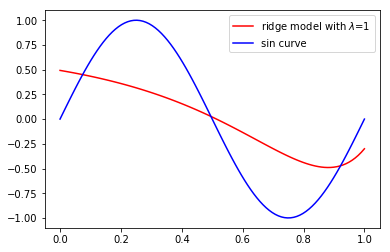

In [25]:
xx = np.linspace(0,1,100)
xx = xx.reshape(100,1)
zz = np.zeros((100,))
for model in models:
    yy=model.predict(poly.fit_transform(xx))
    zz = zz + yy
zz = zz/50
plt.figure()
plt.plot(xx, zz,'r',label='ridge model with $\lambda$=1')
plt.plot(xx, np.sin(2*np.pi*xx), 'b', label='sin curve')
plt.legend()


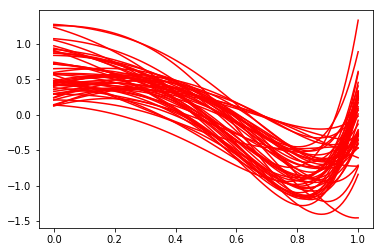

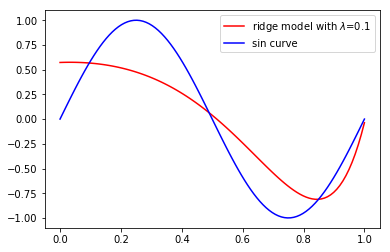

In [26]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model
models = []
poly = PolynomialFeatures(degree = 9) 
#X_poly = poly.fit_transform(X_train)
alpha = 0.05
for z in datasets:
    x = np.linspace(0,1,10,dtype=float)
    x = x.reshape(10,1)
    X = poly.fit_transform(x)
    reg = linear_model.Ridge(alpha=alpha)
    reg.fit(X, z)
    xx = np.linspace(0,1,100)
    xx = xx.reshape(100,1)
    models.append(reg)
    plt.plot(xx, reg.predict(poly.fit_transform(xx)),'r')
plt.show()

xx = np.linspace(0,1,100)
xx = xx.reshape(100,1)
zz = np.zeros((100,))
for model in models:
    yy=model.predict(poly.fit_transform(xx))
    zz = zz + yy
zz = zz/50
plt.figure()
plt.plot(xx, zz,'r',label='ridge model with $\lambda$=0.1')
plt.plot(xx, np.sin(2*np.pi*xx), 'b', label='sin curve')
plt.legend()
plt.show()

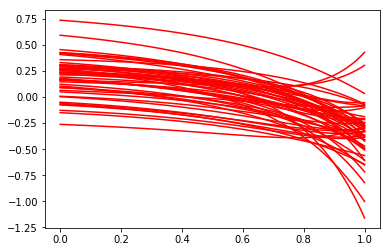

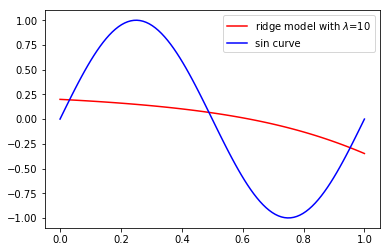

In [27]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model
models = []
poly = PolynomialFeatures(degree = 9) 
#X_poly = poly.fit_transform(X_train)
alpha = 5
for z in datasets:
    x = np.linspace(0,1,10,dtype=float)
    x = x.reshape(10,1)
    X = poly.fit_transform(x)
    reg = linear_model.Ridge(alpha=alpha)
    reg.fit(X, z)
    xx = np.linspace(0,1,100)
    xx = xx.reshape(100,1)
    models.append(reg)
    plt.plot(xx, reg.predict(poly.fit_transform(xx)),'r')
plt.show()

xx = np.linspace(0,1,100)
xx = xx.reshape(100,1)
zz = np.zeros((100,))
for model in models:
    yy=model.predict(poly.fit_transform(xx))
    zz = zz + yy
zz = zz/50
plt.figure()
plt.plot(xx, zz,'r',label='ridge model with $\lambda$=10')
plt.plot(xx, np.sin(2*np.pi*xx), 'b', label='sin curve')
plt.legend()
plt.show()

**If the model we are trying to fit is of low complexity, it's high bias.(Underfit).  
If the model we are trying to fit is of high complexity, it's high variance (Overfit).**

**Bias-Variance Tradeoff:  
    Whenever we try to decrease either of bias or variance, the other one tends to increase. It's like a trade-off.**

# Problem 3: Logistic Regression

## Binary Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic **sigmoid function** $h_ \theta (\cdot)$ to return a probability value which can then be mapped to two or more discrete classes. $$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{- \theta^Tx} }  $$ 

<br>here, the vector $\theta$ represents the weights and the vector $x$ represents the given inputs.


## Problem 3, Part A: Dataset A



Use Dataset A (``data_prob3_parta.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [98]:
import pandas as pd
import numpy as np
dataA = pd.read_csv('./data_prob3_parta.csv')

In [99]:
dataA.head()

,Input feature 1,Input feature 2,Output label
0,25.30,20.6,1.0
1,8.41,53.0,0.0
2,15.80,61.3,0.0
3,32.00,31.7,1.0
4,17.60,80.0,0.0


In [100]:
y = dataA['Output label']
X= dataA.drop(['Output label'],axis=1)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

In [102]:
X_train.shape

(1125, 2)

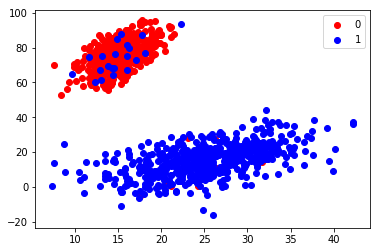

In [103]:
plt.figure()
cdict={0:'red', 1:'blue'}
for i in range(2):
    ix= (y_train==i)
    plt.scatter(X_train[ix]['Input feature 1'], X_train[ix]['Input feature 2'],c='red' if i==0 else 'blue', label = i)
plt.legend()
plt.show()


Build the logistic regression model using the training data. 

The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries. If you are writing your own implementation, try to keep number of features and number of classes as variables for next parts.

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)



In [105]:
logistic_regression.score(X,y)

0.968

Print the final weights.

In [106]:
intercept = logistic_regression.intercept_[0];intercept

0.6227455129957964

In [107]:
coef = logistic_regression.coef_[0]; coef

array([ 0.18925304, -0.08984099])

Print the final accuracy on test data.

In [108]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.96


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

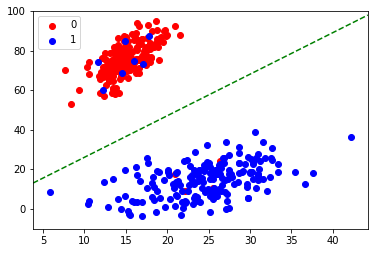

In [117]:
plt.figure()
cdict={0:'red', 1:'blue'}
for i in range(2):
    ix= (y_test==i)
    plt.scatter(X_test[ix]['Input feature 1'], X_test[ix]['Input feature 2'],c='red' if i==0 else 'blue', label = i)
    x1 = np.linspace(5,40,100)
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * coef[0] +intercept)/coef[1]
plt.plot(x_vals, y_vals, '--', c="green")

plt.legend()
plt.show()


In [109]:
x_vals

array([ 7.3584941 , 53.46492417])

## Problem 3, Part B: Dataset B



Use Dataset B (``data_prob3_partb.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [118]:
import pandas as pd
import numpy as np
dataB = pd.read_csv('./data_prob3_partb.csv')

In [119]:
dataB.head()

,Input feature 1,Input feature 2,Output label
0,0.95800,-0.575,1.0
1,0.00799,0.140,1.0
2,1.38000,-0.551,1.0
3,-0.36300,0.960,0.0
4,0.46000,0.701,0.0


In [120]:
y = dataB['Output label']
X= dataB.drop(['Output label'],axis=1)

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

In [122]:
X_train.shape

(1125, 2)

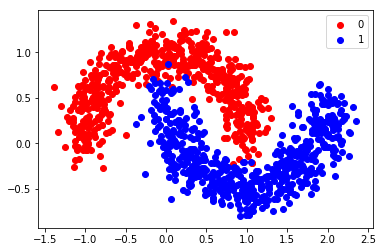

In [123]:
plt.figure()
cdict={0:'red', 1:'blue'}
for i in range(2):
    ix= (y_train==i)
    plt.scatter(X_train[ix]['Input feature 1'], X_train[ix]['Input feature 2'],c='red' if i==0 else 'blue', label = i)
plt.legend()
plt.show()


Build the logistic regression model using the training data. 

The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries. If you are writing your own implementation, try to keep number of features and number of classes as variables for next parts.

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)



In [125]:
logistic_regression.score(X,y)

0.8753333333333333

Print the final weights.

In [126]:
intercept = logistic_regression.intercept_[0];intercept

0.48076684579389733

In [127]:
coef = logistic_regression.coef_[0]; coef

array([ 1.25099661, -4.51647349])

Print the final accuracy on test data.

In [128]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8666666666666667


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

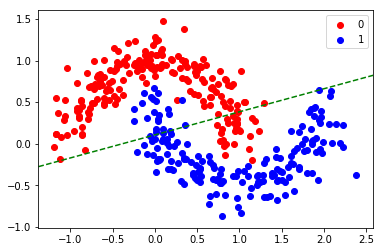

In [129]:
plt.figure()
cdict={0:'red', 1:'blue'}
for i in range(2):
    ix= (y_test==i)
    plt.scatter(X_test[ix]['Input feature 1'], X_test[ix]['Input feature 2'],c='red' if i==0 else 'blue', label = i)
    x1 = np.linspace(5,40,100)
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * coef[0] +intercept)/coef[1]
plt.plot(x_vals, y_vals, '--', c="green")

plt.legend()
plt.show()


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

As you can see, a straight line is not the best decision boundary for this type of data. In the next part, we will try polynomial feature mapping to generate more features and build the classifier on top of it.

## Problem 3, Part C: Polynomial Feature Mapping



Use Dataset B (``data_prob3_partb.csv``) for this part of the question.


In [110]:
import pandas as pd
import numpy as np
dataC = pd.read_csv('./data_prob3_partb.csv')

Generate more features for each datapoint using the following transformation.

For a datapoint $(x_1, x_2)$,
$$ (x_1, x_2) \rightarrow (x_1, x_2, x_1^2, x_2^2, x_1^3, x_2^3, ..., x_1^T, x_2^T) $$
Now, instead of giving $(x_1, x_2)$ as the input to the classifier, use the transformed data as the input to the classifier.

Generate the transformed training and testing dataset using Dataset B (``data_prob3_partb.csv``).

In [111]:

y = dataC['Output label']
X= dataC.drop(['Output label'],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [112]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train)


Build the logistic regression model using the transformed training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_reg = LogisticRegression()
log_reg.fit(X_poly,y_train)

y_pred=log_reg.predict(poly.fit_transform(X_test))
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.864


Try different values of $T$ (highest number of degree) between 3 to 10. Find out which value of $T$ gives the best test accuracy. Please print that values of $T$ in the below cell.

In [114]:
for t in range(2,11):
    poly = PolynomialFeatures(degree = t) 
    X_poly = poly.fit_transform(X_train)
    
    log_reg = LogisticRegression()
    log_reg.fit(X_poly,y_train)
    print('\nTrain accuracy for',t,'-degree model:',log_reg.score(poly.fit_transform(X),y))
    
    y_pred=log_reg.predict(poly.fit_transform(X_test))
    print('Test Accuracy for ',t,'-degree model: ',metrics.accuracy_score(y_test, y_pred))


Train accuracy for 2 -degree model: 0.874
Test Accuracy for  2 -degree model:  0.864

Train accuracy for 3 -degree model: 0.976
Test Accuracy for  3 -degree model:  0.968

Train accuracy for 4 -degree model: 0.9833333333333333
Test Accuracy for  4 -degree model:  0.976

Train accuracy for 5 -degree model: 0.986
Test Accuracy for  5 -degree model:  0.9786666666666667

Train accuracy for 6 -degree model: 0.9873333333333333
Test Accuracy for  6 -degree model:  0.9813333333333333

Train accuracy for 7 -degree model: 0.986
Test Accuracy for  7 -degree model:  0.9786666666666667

Train accuracy for 8 -degree model: 0.988
Test Accuracy for  8 -degree model:  0.9786666666666667

Train accuracy for 9 -degree model: 0.988
Test Accuracy for  9 -degree model:  0.9786666666666667

Train accuracy for 10 -degree model: 0.9866666666666667
Test Accuracy for  10 -degree model:  0.9733333333333334


Since accuracy slightly saturates from degree-4 model, we'll proceed with it.

Print the final weights.

In [115]:
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train)

log_reg = LogisticRegression()
log_reg.fit(X_poly,y_train)
    
y_pred=log_reg.predict(poly.fit_transform(X_test))

intercept = log_reg.intercept_[0];intercept

1.4461951379645313

In [116]:
coef = log_reg.coef_[0]; coef

array([ 1.44619514, -0.22594524, -3.41240872, -7.04182758, -1.52244919,
       -0.4950349 ,  1.7146317 , -2.54435055,  1.06444146, -2.09188436,
        1.99375509, -0.11424953,  0.12386629, -0.10847462, -1.42419403])

Print the final accuracy on transformed test data.

In [117]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.976


Plot the scatter plot on test data (note that this is  the original data , not the transformed one). On top of this scatter plot, plot the new decision boundaries.

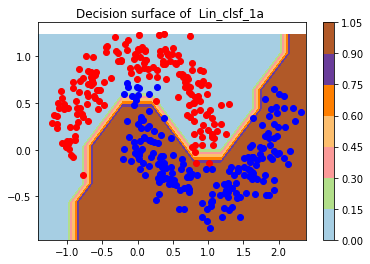

In [120]:
plt.figure()
cdict={0:'red', 1:'blue'}
for i in range(2):
    ix= (y_test==i)
    plt.scatter(X_test[ix]['Input feature 1'], X_test[ix]['Input feature 2'],c='red' if i==0 else 'blue', label = i)
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = np.array(ax.get_ylim())
#plt.plot(x_vals, y_vals, '--', c="green")

#plt.legend()
#plt.show()

h = 0.2
x_min, x_max = x_vals 
y_min, y_max = y_vals

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = log_reg.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
#plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface ")
plt.axis('tight')
plt.colorbar()

cdict={0:'red', 1:'blue'}
for i in range(2):
    ix= (y_test==i)
    plt.scatter(X_test[ix]['Input feature 1'], X_test[ix]['Input feature 2'],c='red' if i==0 else 'blue', label = i)

## Problem 3, Part D: Multi-class Logistic Regression

## Multi-class Logistic Regression

In case of a multi-class classification problem (when the number of classes is greater than two), a **softmax function** is used instead. 
$$\text{Softmax}(\theta_{i}) = \frac{\exp(\theta_i)}{\sum_{j=1}^{N} \exp(\theta_j)}$$ where $j$ varies from $1$ to $N$ which is the number of classes and  $\theta_{i}$ is $$\theta_{i}=W_{i}*x^{(i)}+b$$ Where $x^{(i)}$ is a feature  vector of dimensions $D \times 1$ and $W_{i}$ is the $i$-th row of the weight matrix $ W$ of  dimensions $N \times D$  and $b$ is the bias having dimensions $D \times 1$.


Use Dataset D (``data_prob3_partd.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [28]:
import pandas as pd
import numpy as np
dataD = pd.read_csv('./data_prob3_partd.csv')

In [29]:
dataD['Output label'].unique()

array([2., 1., 0.])

In [30]:
y = dataD['Output label']
X= dataD.drop(['Output label'],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

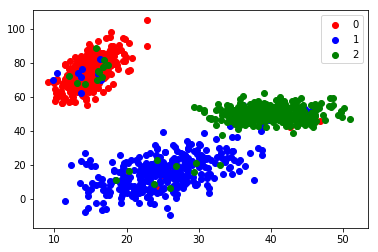

In [31]:
import matplotlib.pyplot as plt
plt.figure()
cdict={0:'red', 1:'blue',2:'green'}
for i in range(3):
    ix= (y_train==i)
    plt.scatter(X_train[ix]['Input feature 1'], X_train[ix]['Input feature 2'],c=cdict[i], label = i)
plt.legend()
plt.show()

Build the logistic regression model using the training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
multi_class='ovr'
clf = LogisticRegression(multi_class='ovr')
clf.fit(X_train,y_train)

print("training score : %.3f " % (clf.score(X, y)))


training score : 0.943 


Print the final weights.

In [33]:
intercept = clf.intercept_;intercept

array([-0.5586898 ,  5.96339468, -9.20234659])

In [34]:
coef = clf.coef_; coef

array([[-0.19388295,  0.08486393],
       [-0.04958299, -0.13053627],
       [ 0.23884796,  0.03459586]])

Print the final accuracy on test data.

In [10]:
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9413333333333334


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

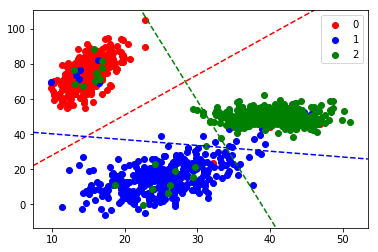

In [11]:
plt.figure()
cdict={0:'red', 1:'blue',2:'green'}
for i in range(3):
    ix= (y_train==i)
    plt.scatter(X_train[ix]['Input feature 1'], X_train[ix]['Input feature 2'],c=cdict[i], label = i)
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals_1 = -(x_vals * coef[0][0] +intercept[0])/coef[0][1]
y_vals_2 = -(x_vals * coef[1][0] +intercept[1])/coef[1][1]
y_vals_3 = -(x_vals * coef[2][0] +intercept[2])/coef[2][1]

plt.plot(x_vals, y_vals_1,'--', c='red')
plt.plot(x_vals, y_vals_2,'--', c='blue')
plt.plot(x_vals, y_vals_3,'--', c='green')

plt.legend()
plt.show()

# Problem 4: Learning on real world datasets

*Cric_data.csv* contains the batting averages and bowling averages of various cricket players along with their role in the team (Bowler/Batsman/Allrounder). The task is to predict the player role based on their batting and bowling averages.

In the next CodeWrite cell, extract the required columns from the csv file, partition the data into training (75%) and testing (25%) data randomly.  

In [35]:
# Extract data and partition

import pandas as pd
inp = pd.read_csv('Cric_data.csv', usecols=['Batting Average', 'Bowling Average', 'Player Class']).values

X = inp[:,:2]
y = inp[:, 2]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


**Binary Classification:**

Derive the classifiers under the assumptions below, and use ML estimators to compute and return the results on the test set. *Consider only batsmen and bowlers in this part*.

Let random variable $\underline X$ represent (Batting Average, Bowling Average) of a player whose role is a random variable $Y$.

1a) Linear Predictor: Assume $\underline X|Y=Batsman \sim \mathcal{N}(\underline {\mu_-}, I)$ and  $X|Y=Bowler \sim \mathcal{N}(\underline {\mu_+}, I)$. 

1b) Bayes Classifier: Assume $\underline X|Y=Batsman \sim \mathcal{N}(\underline {\mu_-}, \Sigma_-)$ and  $X|Y=Bowler \sim \mathcal{N}(\underline {\mu_+}, \Sigma_+)$. 

In [36]:
def Lin_clsf_1a(X_train, y_train, X_test):
    """ Give prediction for test data using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,2)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    import numpy as np
    
    X_minus = X_train[y_train== -1]
    
    mean_minus = X_minus.mean(0)
    #cov_minus = np.cov(X_minus.T)
    
    
    X_plus = X_train[y_train== 1]
    
    mean_plus = X_plus.mean(0)
    #cov_plus = np.cov(X_plus.T)
    
    from scipy.stats import multivariate_normal
    
    y_minus = multivariate_normal.pdf(X_test, mean=mean_minus, cov= np.identity(2))
    y_plus = multivariate_normal.pdf(X_test, mean=mean_plus, cov= np.identity(2))
    
    y_pred=np.ones(y_plus.shape)
    for i in range(len(y_plus)):    
        y_pred[i] =  -1 if y_minus[i] > y_plus[i] else 1
    
    return y_pred

def Bayes_clsf_1b(X_train, y_train, X_test):
    """ Give prediction for test data using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,2)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    import numpy as np
    
    X_minus = X_train[y_train== -1]
    
    mean_minus = X_minus.mean(0)
    cov_minus = np.cov(X_minus.T)
    
    X_plus = X_train[y_train== 1]
    
    mean_plus = X_plus.mean(0)
    cov_plus = np.cov(X_plus.T)
    
    from scipy.stats import multivariate_normal
    
    y_minus = multivariate_normal.pdf(X_test, mean=mean_minus, cov= cov_minus)
    y_plus = multivariate_normal.pdf(X_test, mean=mean_plus, cov= cov_plus)
    
    y_pred=np.ones(y_plus.shape)
    for i in range(len(y_plus)):    
        y_pred[i] =  -1 if y_minus[i] > y_plus[i] else 1
    
    return y_pred

In [37]:
y_pred1 = Lin_clsf_1a(X_train, y_train, X_test[y_test != 0])
y_pred2 = Bayes_clsf_1b(X_train, y_train, X_test[y_test != 0])

from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test[y_test != 0], y_pred1))
print('Accuracy: ',metrics.accuracy_score(y_test[y_test != 0], y_pred2))

Accuracy:  0.8252427184466019
Accuracy:  0.9271844660194175


**Multi-class Classification:**

Derive the classifiers under the assumptions below, and use ML estimators to compute and return the results on the test set. *Consider batsmen, bowlers and allrounders in this part*.

Let random variable $\underline X$ represent (Batting Average, Bowling Average) of a player whose role is a random variable $Y$.

The $3\times 3$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below. (Ordering: Batsman - Allrounder - Bowler)

$L=\begin{bmatrix} 0 &1 & 2\\ 1 &0 & 1\\ 2 &1 & 0\end{bmatrix}$ 

2a) Linear Predictor: Assume $\underline X|Y=a \sim \mathcal{N}(\underline {\mu_a}, I)$

2b) Bayes Classifier: Assume $\underline X|Y=a \sim \mathcal{N}(\underline {\mu_a}, \Sigma_a)$

In [38]:
def Lin_clsf_2a(X_train, y_train, X_test):
    """ Give prediction for test data using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,3)
    Y_train: +1/0/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,3)

    Returns:
    Y_test_pred : +1/0/-1 numpy array of shape (m,)

    """
    import numpy as np
    
    X_minus = X_train[y_train== -1]
    
    mean_minus = X_minus.mean(0)
    #cov_minus = np.cov(X_minus.T)
    
    X_zero = X_train[y_train== 0]
    
    mean_zero = X_zero.mean(0)
    
    X_plus = X_train[y_train== 1]
    
    mean_plus = X_plus.mean(0)
    #cov_plus = np.cov(X_plus.T)
    
    from scipy.stats import multivariate_normal
    
    y_minus = multivariate_normal.pdf(X_test, mean=mean_minus, cov= np.identity(2))
    y_zero = multivariate_normal.pdf(X_test, mean=mean_zero, cov= np.identity(2))
    y_plus = multivariate_normal.pdf(X_test, mean=mean_plus, cov= np.identity(2))
    
    y = np.c_[y_minus,y_zero, y_plus]
    
    #L_ = np.matmul(y, L)
    #print(y.shape,L.shape)
    #L_zero =   np.matmul(y, L[1])
    #L_plus = np.matmul(y, L[2])
    
    y_pred=np.ones(y_plus.shape)
    loss_plus=np.ones(y_plus.shape)
    loss_zero=np.ones(y_plus.shape)
    loss_minus=np.ones(y_plus.shape)
    for i in range(len(y_plus)):
        loss_plus[i] = (y_zero[i]) + (2*y_minus[i])
        loss_zero[i] = (y_plus[i]) + (y_minus[i])
        loss_minus[i] = (2*y_plus[i]) + (y_zero[i]) 
        
        y_pred[i] =  np.argmin( np.array([loss_minus[i], loss_zero[i], loss_plus[i]]))-1
        
    
    return y_pred





def Bayes_clsf_2b(X_train, y_train, X_test):
    """ Give prediction for test data using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,3)
    Y_train: +1/0/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,3)

    Returns:
    Y_test_pred : +1/0/-1 numpy array of shape (m,)

    """
    import numpy as np
    
    X_minus = X_train[y_train== -1]
    
    mean_minus = X_minus.mean(0)
    cov_minus = np.cov(X_minus.T)
    
    X_zero = X_train[y_train== 0]
    
    mean_zero = X_zero.mean(0)
    cov_zero = np.cov(X_zero.T)
    
    X_plus = X_train[y_train== 1]
    
    mean_plus = X_plus.mean(0)
    cov_plus = np.cov(X_plus.T)
    
    from scipy.stats import multivariate_normal
    
    y_minus = multivariate_normal.pdf(X_test, mean=mean_minus, cov= cov_minus)
    y_zero = multivariate_normal.pdf(X_test, mean=mean_zero, cov= cov_zero)
    y_plus = multivariate_normal.pdf(X_test, mean=mean_plus, cov= cov_plus)
    
    y_pred=np.ones(y_plus.shape)
    loss_plus=np.ones(y_plus.shape)
    loss_zero=np.ones(y_plus.shape)
    loss_minus=np.ones(y_plus.shape)
    for i in range(len(y_plus)):
        loss_plus[i] = (y_zero[i]) + (2*y_minus[i])
        loss_zero[i] = (y_plus[i]) + (y_minus[i])
        loss_minus[i] = (2*y_plus[i]) + (y_zero[i]) 
        y_pred[i] =  np.argmin( np.array([loss_minus[i], loss_zero[i], loss_plus[i]]))-1
    
    return y_pred    

In [39]:
y_pred1 = Lin_clsf_2a(X_train, y_train, X_test)
y_pred2 = Bayes_clsf_2b(X_train, y_train, X_test)

from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred1))
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred2))

Accuracy:  0.7044025157232704
Accuracy:  0.6729559748427673


**Plots:**

In the next CodeWrite cell, plot all the 4 classifiers on a 2d plot. Take a suitable grid covering averages (0,60) in both dimensions. (Color the different classes accordingly). Add the training data points also on the plot. Label the plots appropriately. 

In [40]:
import matplotlib.pyplot as plt
import numpy as np

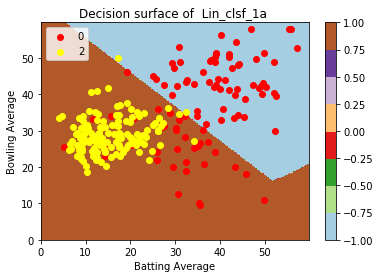

In [41]:
h = 0.2
x_min, x_max, y_min, y_max = 0, 60, 0, 60
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = Lin_clsf_1a(X[y!=0], y[y!=0], np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface of  Lin_clsf_1a ")
plt.axis('tight')
plt.xlabel('Batting Average')
plt.ylabel('Bowling Average')
plt.colorbar()
cdict={0:'red', 1:'blue',2:'yellow'}
for i in [0,2]:
    ix= (y==i-1)
    plt.scatter(X[:,0][ix][::3], X[:,1][ix][::3],c=cdict[i], label = i)
plt.legend()

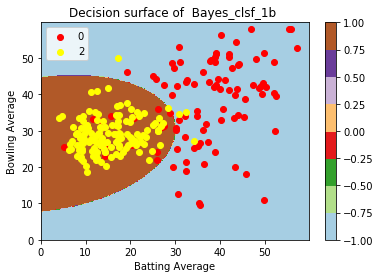

In [42]:
h = 0.2
x_min, x_max, y_min, y_max = 0, 60, 0, 60
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = Bayes_clsf_1b(X[y!=0], y[y!=0], np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface of  Bayes_clsf_1b ")
plt.axis('tight')
plt.xlabel('Batting Average')
plt.ylabel('Bowling Average')
plt.colorbar()
cdict={0:'red', 1:'blue',2:'yellow'}
for i in [0,2]:
    ix= (y==i-1)
    plt.scatter(X[:,0][ix][::3], X[:,1][ix][::3],c=cdict[i], label = i)
plt.legend()

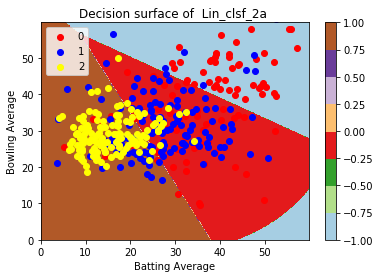

In [43]:
h = 0.2
x_min, x_max, y_min, y_max = 0, 60, 0, 60
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = Lin_clsf_2a(X, y, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface of  Lin_clsf_2a ")
plt.axis('tight')
plt.xlabel('Batting Average')
plt.ylabel('Bowling Average')
plt.colorbar()
cdict={0:'red', 1:'blue',2:'yellow'}
for i in range(3):
    ix= (y==i-1)
    plt.scatter(X[:,0][ix][::3], X[:,1][ix][::3],c=cdict[i], label = i)
plt.legend()

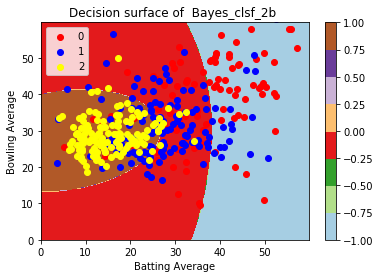

In [44]:
h = 0.2
x_min, x_max, y_min, y_max = 0, 60, 0, 60
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = Bayes_clsf_2b(X, y, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface of  Bayes_clsf_2b ")
plt.axis('tight')
plt.xlabel('Batting Average')
plt.ylabel('Bowling Average')
plt.colorbar()
cdict={0:'red', 1:'blue',2:'yellow'}
for i in range(3):
    ix= (y==i-1)
    plt.scatter(X[:,0][ix][::3], X[:,1][ix][::3],c=cdict[i], label = i)
plt.legend()


**Observations:**

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the four learnt classifiers, and also give the error rate of the four classifiers as a 2x2 table.

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

In [45]:
X[y==-1].mean(0)

array([36.85420925, 51.71939173])

In [46]:
X[y==0].mean(0)

array([27.47091324, 35.03901826])

In [47]:
X[y==1].mean(0)

array([15.18477541, 28.6922695 ])

### Observations
We can observe that batsman has high batting and bowling averages.  
All-rounders have both medium batting and bowling averages, and bowlers have both low. 

| Type    | Linear   | Bayes|
| --------| ---------| ---- |
| Binary  |     82   | 92   |
| Multi   |    70    | 67   |

Actually, the classifiers are pretty good but performance is not so good because of presence of lot of anomalies. Linear Classifiers can only get linear decision boundaries but Bayes classifiers can also create non- linear decision boundaries and can also capture dependance of two features.